In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.interpolate import make_interp_spline 
from scipy.interpolate import InterpolatedUnivariateSpline 
import glob, re
from scipy import stats

# FMO linear and nonlinear QSD comparison

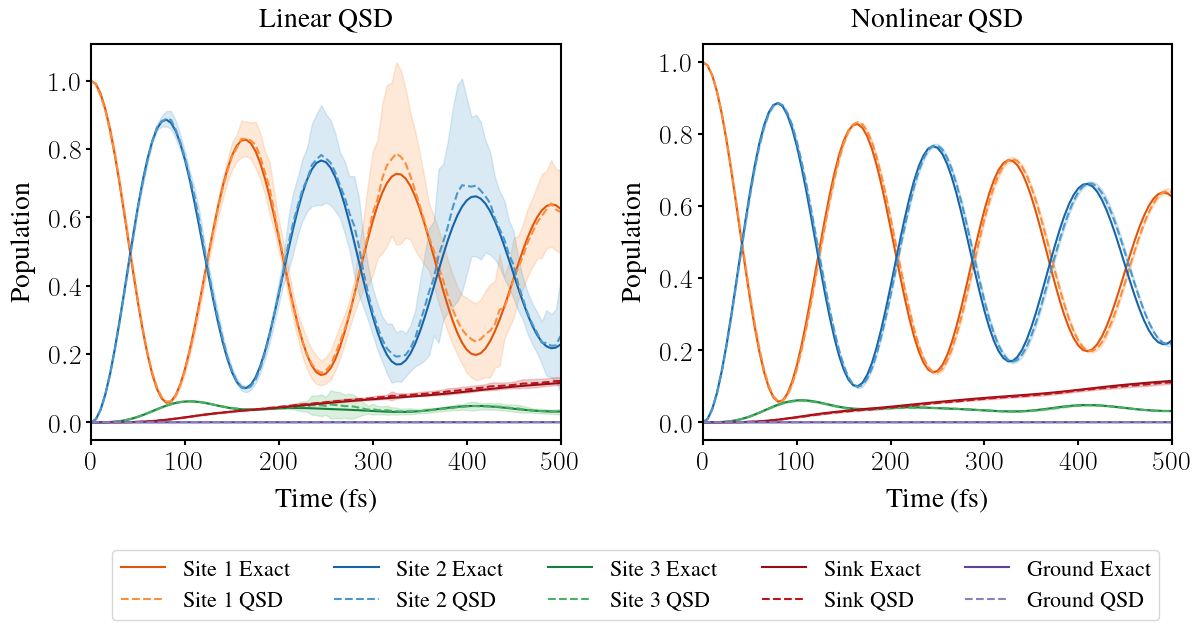

In [68]:
# set the font size and style of the plot
spines_linewidth = 1.5
linewidth = 1.5
font_size = 20
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times New Roman",
    "font.size": font_size
})
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
plt.rcParams['text.latex.preamble'] = r'\usepackage{times}'

# plot the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.tight_layout(w_pad=3)
T = 500
step_num = 100
tlist = np.linspace(0.0, T, step_num+1)
ax1.set_xlim([0,T])
ax1.spines['top'].set_linewidth(spines_linewidth)
ax1.spines['right'].set_linewidth(spines_linewidth)
ax1.spines['bottom'].set_linewidth(spines_linewidth)
ax1.spines['left'].set_linewidth(spines_linewidth)
ax2.set_xlim([0,T])
ax2.spines['top'].set_linewidth(spines_linewidth)
ax2.spines['right'].set_linewidth(spines_linewidth)
ax2.spines['bottom'].set_linewidth(spines_linewidth)
ax2.spines['left'].set_linewidth(spines_linewidth)

colormap_red = plt.get_cmap('Reds')
colormap_green = plt.get_cmap('Greens')
colormap_blue = plt.get_cmap('Blues')
colormap_orange = plt.get_cmap('Oranges')
colormap_purple = plt.get_cmap('Purples')

exact_color_per = 0.8
qsd_color_per = 0.6
shade_color_per = 0.2

color_exact = [colormap_orange(exact_color_per-0.1), 
               colormap_blue(exact_color_per), 
               colormap_green(exact_color_per), 
               colormap_red(exact_color_per+0.1), 
               colormap_purple(exact_color_per)]
color_linear = [colormap_orange(qsd_color_per-0.1), 
                colormap_blue(qsd_color_per), 
                colormap_green(qsd_color_per), 
                colormap_red(qsd_color_per+0.2), 
                colormap_purple(qsd_color_per)]
legend_labels_exact = ['Site 1 Exact', 'Site 2 Exact', 'Site 3 Exact', 'Sink Exact', 'Ground Exact']
legend_labels_qsd = ['Site 1 QSD', 'Site 2 QSD', 'Site 3 QSD', 'Sink QSD', 'Ground QSD']

# FMO linear QSD
linear_files_list = glob.glob('FMO_data/linear_nonlinear/comparison_linear_1000traj_100step_False_*.npz')
exact = np.load("FMO_data/linear_nonlinear/comparison_linear_1000traj_100step_False_0.npz")
array_linear_qsd = []
for file in linear_files_list:
    data = np.load(file)
    array_linear_qsd.append(data['qsd_result'])

# calculate the mean and standard deviation of the QSD results
mean_values_linear = np.mean(array_linear_qsd, axis=0)
std_values_linear = np.std(array_linear_qsd, axis=0)
z_value = 3.249  # 99% confidence interval
n_samples = 10  # number of samples
margin_of_error_linear = z_value * (std_values_linear / np.sqrt(n_samples)) # margin of error

for i in range(5):
    ax1.plot(tlist, exact['exact_result'][i], label=legend_labels_exact[i], linewidth=linewidth, color=color_exact[i])
    ax1.plot(tlist, mean_values_linear[:, i, 0], label=legend_labels_qsd[i], linewidth=linewidth, linestyle='--', color=color_linear[i])
    ax1.fill_between(tlist, mean_values_linear[:, i, 0]-margin_of_error_linear[:, i, 0], 
                     mean_values_linear[:, i, 0]+margin_of_error_linear[:, i, 0], color=color_linear[i], alpha=shade_color_per)

# FMO nonlinear QSD
nonlinear_files_list = glob.glob('FMO_data/linear_nonlinear/comparison_nonlinear_1000traj_100step_False_*.npz')
exact = np.load("FMO_data/linear_nonlinear/comparison_linear_1000traj_100step_False_0.npz")
array_nonlinear_qsd = []
for file in nonlinear_files_list:
    data = np.load(file)
    array_nonlinear_qsd.append(data['qsd_result'])

# calculate the mean and standard deviation of the QSD results
mean_values_nonlinear = np.mean(array_nonlinear_qsd, axis=0)
std_values_nonlinear = np.std(array_nonlinear_qsd, axis=0)
z_value = 2.596  # 99% confidence interval
n_samples = 10  # number of samples
margin_of_error_nonlinear = z_value*(std_values_nonlinear/np.sqrt(n_samples)) # margin of error

for i in range(5):
    ax2.plot(tlist, exact['exact_result'][i], label=legend_labels_exact[i], linewidth=linewidth, color=color_exact[i])
    ax2.plot(tlist, mean_values_nonlinear[:, i, 0], label=legend_labels_qsd[i], linewidth=linewidth, linestyle='--', color=color_linear[i])
    ax2.fill_between(tlist, mean_values_nonlinear[:, i, 0]-margin_of_error_nonlinear[:, i, 0], 
                     mean_values_nonlinear[:, i, 0]+margin_of_error_nonlinear[:, i, 0], color=color_linear[i], alpha=shade_color_per)

ax1.set_title(r'{Linear QSD}', fontsize=font_size, y=1.02)
ax2.set_title(r'{Nonlinear QSD}', fontsize=font_size, y=1.02)
ax1.set_xlabel(r'{Time (fs)}', fontsize=font_size, labelpad=10)
ax1.set_ylabel(r'{Population}', fontsize=font_size, labelpad=10)
ax1.tick_params(width=spines_linewidth, labelsize=font_size)
ax2.set_xlabel(r'{Time (fs)}', fontsize=font_size, labelpad=10)
ax2.set_ylabel(r'{Population}', fontsize=font_size, labelpad=10)
ax2.tick_params(width=spines_linewidth, labelsize=font_size)

ax1.legend(fontsize=font_size-4, ncol=5, bbox_to_anchor=(2.3, -0.25))

plt.savefig('FMO_linear_nonlinear_comp.pdf', dpi=600, bbox_inches='tight')

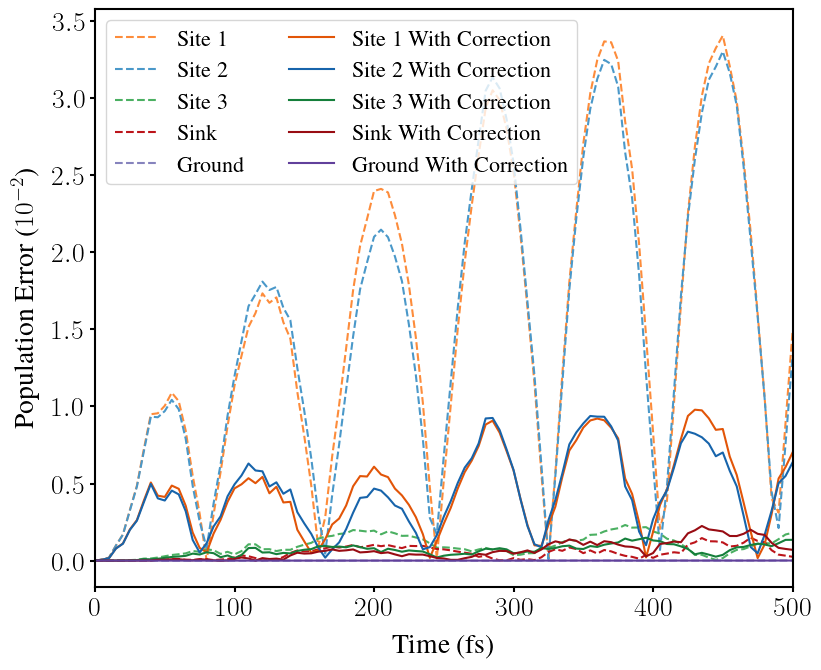

In [70]:
# set the font size and style of the plot
spines_linewidth = 1.5
linewidth = 1.5
font_size = 20
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times New Roman",
    "font.size": font_size
})
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
plt.rcParams['text.latex.preamble'] = r'\usepackage{times}'

# Compare the error between the corr_true and corr_false
nonlinear = np.load('FMO_data/nonlinear_corr/comparison_nonlinear_10000traj_100step_False_42000.npz')
nonlinear_corr = np.load('FMO_data/nonlinear_corr/comparison_nonlinear_10000traj_100step_True_42000.npz')

exact = nonlinear['exact_result']
exact_T = exact.T
array_False_qsd = nonlinear['qsd_result']
array_True_qsd = nonlinear_corr['qsd_result']

False_data = array_False_qsd[:, :, 0]
True_data = array_True_qsd[:, :, 0]

error_False = np.abs(False_data-exact_T)
error_True = np.abs(True_data-exact_T)

# plot the error
fig, ax1 = plt.subplots(figsize=(9, 7.5))
T = 500
step_num = 100
tlist = np.linspace(0.0, T, step_num+1)
ax1.set_xlim([0,T])
ax1.spines['top'].set_linewidth(spines_linewidth)
ax1.spines['right'].set_linewidth(spines_linewidth)
ax1.spines['bottom'].set_linewidth(spines_linewidth)
ax1.spines['left'].set_linewidth(spines_linewidth)

exact_color_per = 0.6
qsd_color_per = 0.8

color_False = [colormap_orange(exact_color_per-0.1), 
               colormap_blue(exact_color_per), 
               colormap_green(exact_color_per), 
               colormap_red(exact_color_per+0.2), 
               colormap_purple(exact_color_per)]
color_True = [colormap_orange(qsd_color_per-0.1), 
                colormap_blue(qsd_color_per), 
                colormap_green(qsd_color_per), 
                colormap_red(qsd_color_per+0.1), 
                colormap_purple(qsd_color_per)]

legend_labels_False = ['Site 1', 'Site 2', 'Site 3', 'Sink', 'Ground']
legend_labels_True = ['Site 1 With Correction', 'Site 2 With Correction', 'Site 3 With Correction',
                      'Sink With Correction', 'Ground With Correction']

for i in range(5):
    plt.plot(tlist, error_False[:, i]*100, label=legend_labels_False[i], linewidth=linewidth, color=color_False[i], linestyle='--', alpha=1)
for i in range(5):
    plt.plot(tlist, error_True[:, i]*100, label=legend_labels_True[i], color=color_True[i], linewidth=linewidth)

ax1.set_xlabel(r'Time (fs)', fontsize=font_size, labelpad=10)
ax1.set_ylabel(r'Population Error (${10^{-2}}$)', fontsize=font_size, labelpad=10)
ax1.tick_params(width=spines_linewidth, labelsize=font_size)
ax1.legend(loc='upper left', fontsize=font_size-4, ncol=2)
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

plt.savefig('FMO_nonlinear_corr_comp.pdf', dpi=600, bbox_inches='tight')
